In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
import seaborn as sns

In [37]:
attrdata = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [38]:
attrdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [39]:
attrdata.drop(0,inplace=True)
attrdata.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [40]:
attrdata.dropna(axis=0,inplace=True)

In [41]:
attrdata.shape

(1469, 35)

In [42]:
gender_dict = attrdata['Gender'].value_counts()
gender_dict

Male      882
Female    587
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'Count of different gender'}>

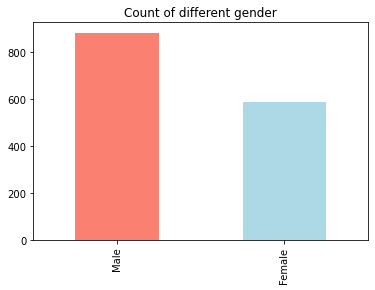

In [43]:
attrdata['Gender'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different gender")

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

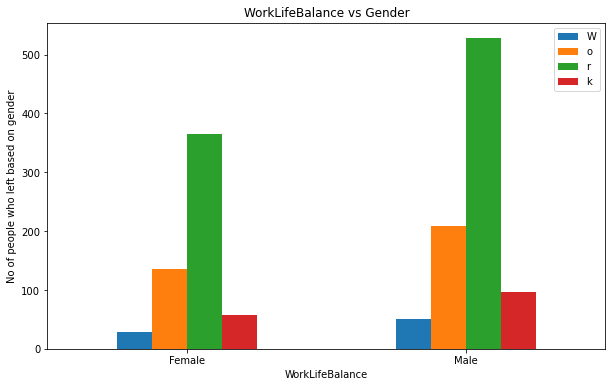

In [44]:
pd.crosstab(attrdata['Gender'],attrdata['WorkLifeBalance']).plot(kind="bar",figsize=(10,6))
plt.title("WorkLifeBalance vs Gender")
plt.xlabel("WorkLifeBalance")
plt.ylabel("No of people who left based on gender")
plt.legend("WorkLifeBalance")
plt.xticks(rotation=0)

In [45]:
promoted_dict = attrdata["JobRole"].value_counts()
promoted_dict

Sales Executive              325
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot:title={'center':'JobRole'}>

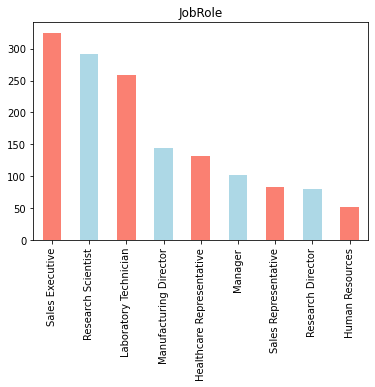

In [46]:
attrdata['JobRole'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="JobRole")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

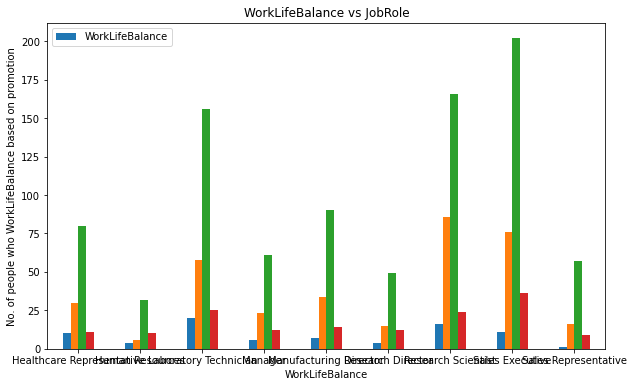

In [47]:
pd.crosstab(attrdata['JobRole'],attrdata['WorkLifeBalance']).plot(kind="bar",figsize=(10,6))
plt.title("WorkLifeBalance vs JobRole")
plt.xlabel("WorkLifeBalance")
plt.ylabel("No. of people who WorkLifeBalance based on promotion")
plt.legend(["WorkLifeBalance"])
plt.xticks(rotation=0)

In [48]:
func_dict = attrdata["PerformanceRating"].value_counts()
func_dict

3    1243
4     226
Name: PerformanceRating, dtype: int64

<AxesSubplot:title={'center':'PerformanceRating in organization'}>

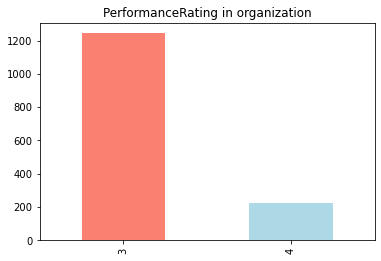

In [49]:
attrdata['PerformanceRating'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="PerformanceRating in organization")

(array([0, 1]), [Text(0, 0, '3'), Text(1, 0, '4')])

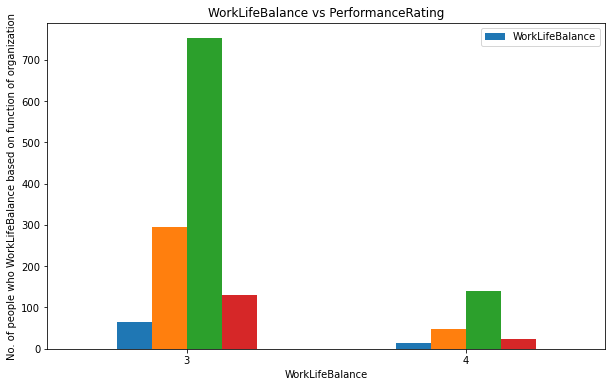

In [50]:
pd.crosstab(attrdata['PerformanceRating'],attrdata['WorkLifeBalance']).plot(kind="bar",figsize=(10,6))
plt.title("WorkLifeBalance vs PerformanceRating")
plt.xlabel("WorkLifeBalance")
plt.ylabel("No. of people who WorkLifeBalance based on function of organization")
plt.legend(["WorkLifeBalance"])
plt.xticks(rotation=0)

In [51]:
Stock_dict = attrdata["StockOptionLevel"].value_counts()
Stock_dict

0    630
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [52]:
Worked_dict = attrdata["NumCompaniesWorked"].value_counts()
print(Stock_dict)

0    630
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


In [53]:
Emp_dict = attrdata["TrainingTimesLastYear"].value_counts()
Emp_dict['other Training'] = 1
print(Emp_dict)

2                 547
3                 491
4                 123
5                 119
1                  71
6                  65
0                  53
other Training      1
Name: TrainingTimesLastYear, dtype: int64


In [54]:
education_dict = attrdata["EducationField"].value_counts()
education_dict

Life Sciences       605
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot:title={'center':'EducationField'}>

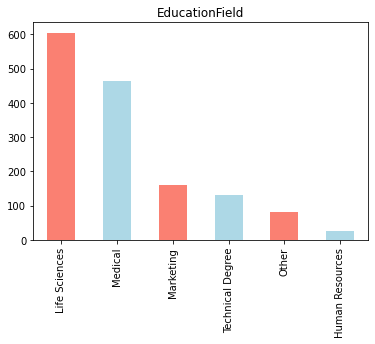

In [55]:
attrdata['EducationField'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="EducationField")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Life Sciences'),
  Text(2, 0, 'Marketing'),
  Text(3, 0, 'Medical'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Technical Degree')])

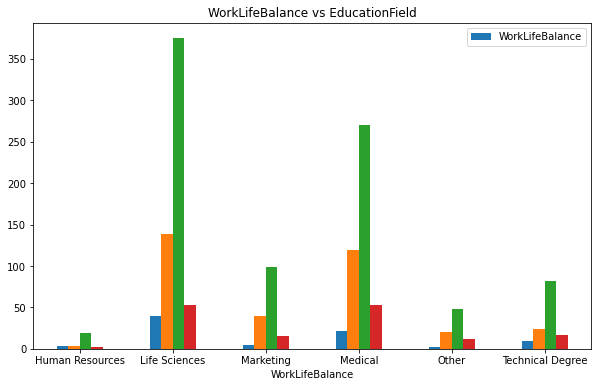

In [56]:
pd.crosstab(attrdata['EducationField'],attrdata['WorkLifeBalance']).plot(kind="bar",figsize=(10,6))
plt.title("WorkLifeBalance vs EducationField")
plt.xlabel("WorkLifeBalance")
plt.legend(["WorkLifeBalance"])
plt.xticks(rotation=0)

In [57]:
dep_dict = attrdata["Department"].value_counts()
print(dep_dict)

Research & Development    961
Sales                     445
Human Resources            63
Name: Department, dtype: int64


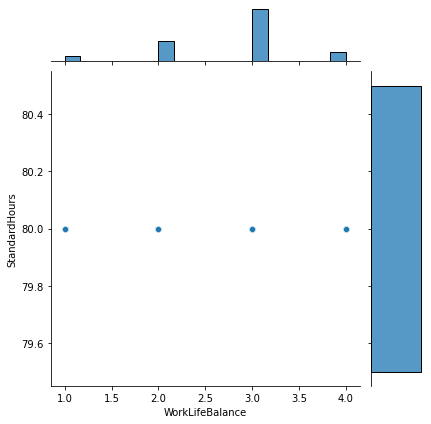

In [59]:
sns.jointplot(x='WorkLifeBalance',y='StandardHours',data=attrdata)

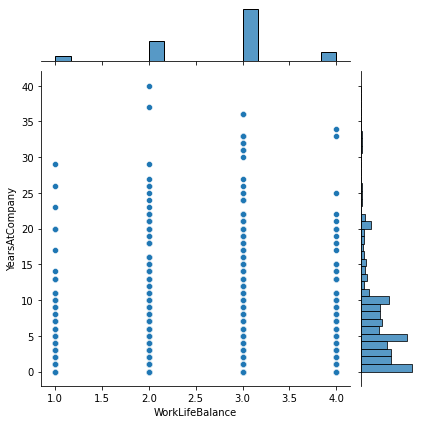

In [60]:
sns.jointplot(x='WorkLifeBalance',y='YearsAtCompany',data=attrdata)

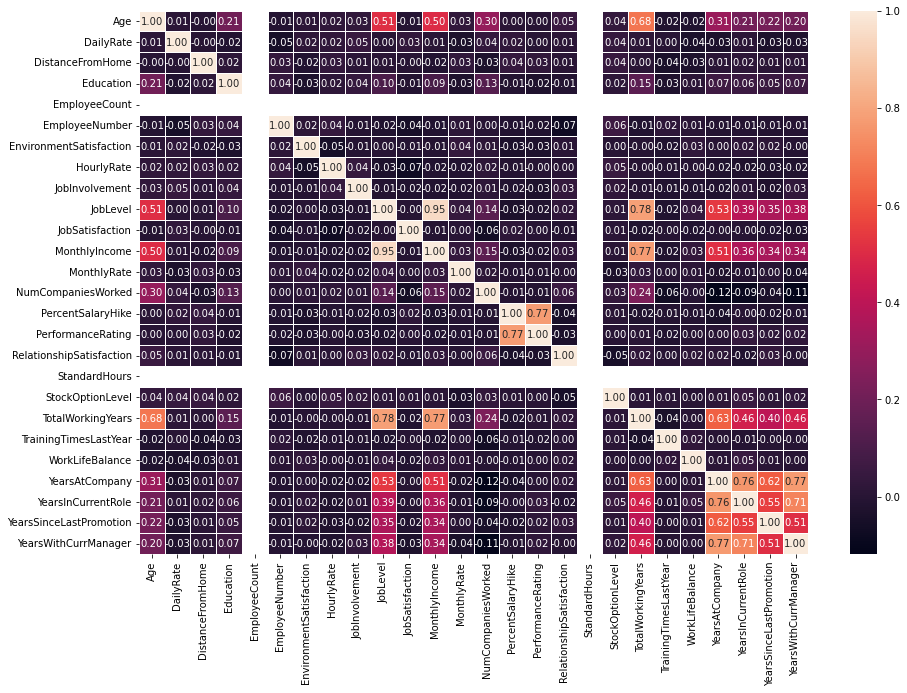

In [61]:
corr_matrix=attrdata.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [65]:
employee_dict = attrdata["EmployeeNumber"].value_counts()
print(employee_dict)

employee_dict_new = {
    'shubham':21,
    'jack':   22,   
    'yogesh': 23,    
    'kiran':  24,
    'sam':    25,      
    'Ayush':  26,    
    'Adi':    27,  
    'sid':    28
}
print(employee_dict_new)

2       1
1392    1
1390    1
1389    1
1387    1
       ..
661     1
659     1
657     1
656     1
2068    1
Name: EmployeeNumber, Length: 1469, dtype: int64
{'shubham': 21, 'jack': 22, 'yogesh': 23, 'kiran': 24, 'sam': 25, 'Ayush': 26, 'Adi': 27, 'sid': 28}


In [71]:
gen = pd.get_dummies(attrdata["Department"])
gen.head()

,Human Resources,Research & Development,Sales
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


In [72]:
hr = pd.get_dummies(attrdata["EducationField"])
hr.head()

,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
5,0,1,0,0,0,0


In [75]:
def JobRole(x):
    if x == 'JobRole':
        return int(1)
    else:
        return int(0)

data_l = attrdata["JobRole"].apply(JobRole)
attrdata['New JobRole'] = data_l
attrdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,New JobRole
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,80,0,8,2,2,7,7,3,6,0


In [76]:
Emp_dict_new = {
    'B1': 4,
    'B2': 3,
    'B3': 2,
    'other group': 1,
}

In [77]:
def emp(x):
    if str(x) in Emp_dict_new.keys():
        return str(x)
    else:
        return 'other group'
 
data_l = attrdata["JobLevel"].apply(emp)
attrdata['New EMP'] = data_l

emp = pd.get_dummies(attrdata["New EMP"])
attrdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,New JobRole,New EMP
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,0,other group
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,0,other group
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,0,other group
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,0,other group
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,0,8,2,2,7,7,3,6,0,other group


In [78]:
def Job(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)
    
data_l = attrdata["JobInvolvement"].apply(Job)
attrdata['New Job Role Match'] = data_l
attrdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,New JobRole,New EMP,New Job Role Match
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,other group,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,0,other group,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,0,other group,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,0,other group,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,8,2,2,7,7,3,6,0,other group,0


In [79]:
def Gen(x):
    if x in gender_dict.keys():
        return str(x)
    else:
        return 'other'

data_l = attrdata["Gender"].apply(Gen)
attrdata['New Gender'] = data_l
attrdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,New JobRole,New EMP,New Job Role Match,New Gender
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,0,other group,0,Male
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,0,other group,0,Male
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,8,7,3,0,0,other group,0,Female
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,2,2,2,2,0,other group,0,Male
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,2,2,7,7,3,6,0,other group,0,Male


In [80]:
gend = pd.get_dummies(attrdata["New Gender"])
gend.head()


,Female,Male
1,0,1
2,0,1
3,1,0
4,0,1
5,0,1


In [81]:
tengrp = pd.get_dummies(attrdata["EmployeeCount"])
tengrp.head()

,1
1,1
2,1
3,1
4,1
5,1


In [83]:
dataset = pd.concat([attrdata, hr, emp, tengrp, gen, gend], axis = 1)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Medical,Other,Technical Degree,other group,1,Human Resources,Research & Development,Sales,Female,Male
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,0,0,0,1,1,0,1,0,0,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,1,0,1,1,0,1,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,0,0,1,1,0,1,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,0,0,1,1,0,1,0,0,1
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,0,0,0,1,1,0,1,0,0,1


In [84]:
dataset.columns


Index([                     'Age',                'Attrition',
                 'BusinessTravel',                'DailyRate',
                     'Department',         'DistanceFromHome',
                      'Education',           'EducationField',
                  'EmployeeCount',           'EmployeeNumber',
        'EnvironmentSatisfaction',                   'Gender',
                     'HourlyRate',           'JobInvolvement',
                       'JobLevel',                  'JobRole',
                'JobSatisfaction',            'MaritalStatus',
                  'MonthlyIncome',              'MonthlyRate',
             'NumCompaniesWorked',                   'Over18',
                       'OverTime',        'PercentSalaryHike',
              'PerformanceRating', 'RelationshipSatisfaction',
                  'StandardHours',         'StockOptionLevel',
              'TotalWorkingYears',    'TrainingTimesLastYear',
                'WorkLifeBalance',           'YearsAtCo

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [92]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')